# 2019-02-05 - Analyser des fichiers OE, parce que j'ai oublié de changer le format

In [1]:
import OpenEphys as OE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import KwikTools as kt

In [3]:
dataset = OE.loadFolder('ephy_data/2019-02-05_13-24-31_A001/')

Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
L

In [4]:
dataset

{'100_CH16': {'header': {'format': "'Open Ephys Data Format'",
   ' version': '0.4',
   ' header_bytes': '1024',
   'description': "'each record contains one 64-bit timestamp, one 16-bit sample count (N), 1 uint16 recordingNumber, N 16-bit samples, and one 10-byte record marker (0 1 2 3 4 5 6 7 8 255)'",
   ' date_created': "'5-Feb-2019 132431'",
   'channel': "'CH16'",
   'channelType': "'Continuous'",
   'sampleRate': '30000',
   'blockLength': '1024',
   'bufferSize': '1024',
   'bitVolts': '0.195'},
  'timestamps': array([8259000., 8260024., 8261048., ..., 9508280., 9509304., 9510328.]),
  'data': array([-45.63 , -47.775, -42.705, ...,   0.   ,   0.   ,   0.   ]),
  'recordingNumber': array([0., 0., 0., ..., 0., 0., 0.])},
 '100_CH15': {'header': {'format': "'Open Ephys Data Format'",
   ' version': '0.4',
   ' header_bytes': '1024',
   'description': "'each record contains one 64-bit timestamp, one 16-bit sample count (N), 1 uint16 recordingNumber, N 16-bit samples, and one 10-byt

In [5]:
data = dataset['100_CH1']['data']
data.shape

(1252352,)

Text(0.5, 1.0, "Cool it's as noisy as I remember it from patch clamp")

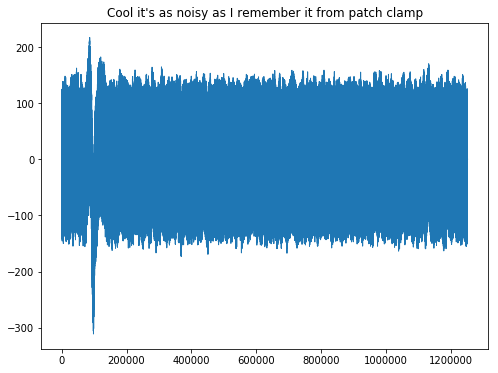

In [6]:
plt.figure(figsize = (8,6))
plt.plot(data, linewidth = 1)
plt.title("Cool it's as noisy as I remember it from patch clamp")

In [7]:
dataset['100_CH1']['timestamps']

array([8259000., 8260024., 8261048., ..., 9508280., 9509304., 9510328.])

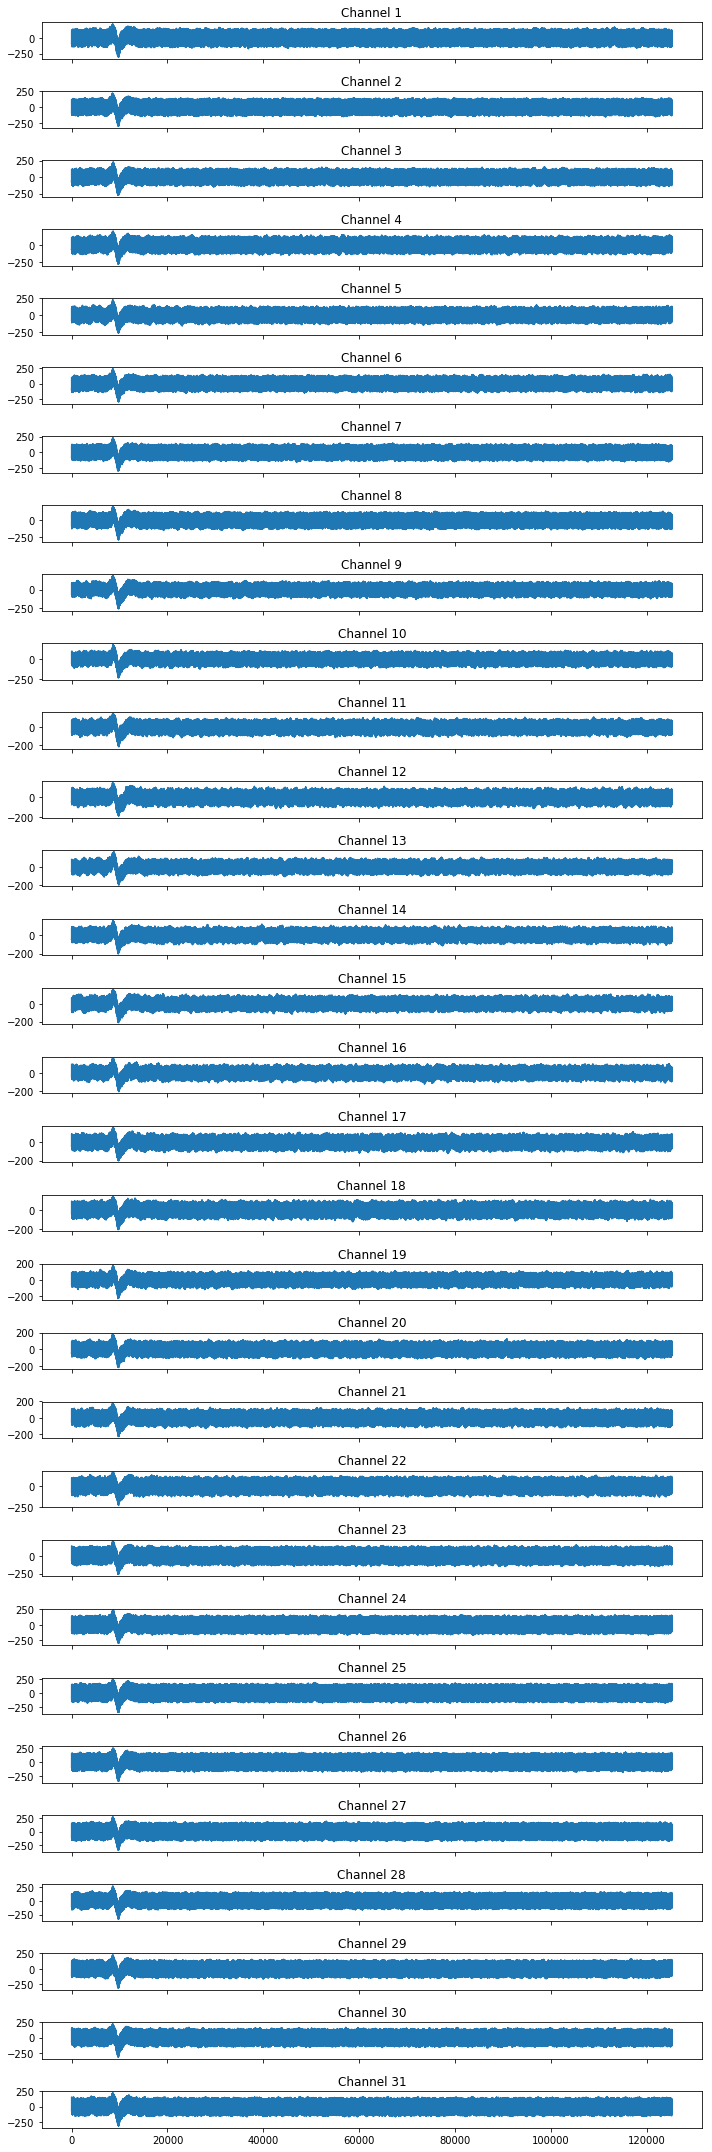

In [8]:
chans = 32
fig, axs = plt.subplots(chans-1,1, figsize = (10,30))

for chan in range(1,chans):
    axs[chan-1].plot(dataset['100_CH%s'%chan]['data'][::10])
    if chan != chans-1 :
        axs[chan-1].set_xticklabels('')
    axs[chan-1].set_title('Channel %s' % (chan))
plt.tight_layout()

Now to find the photodiode

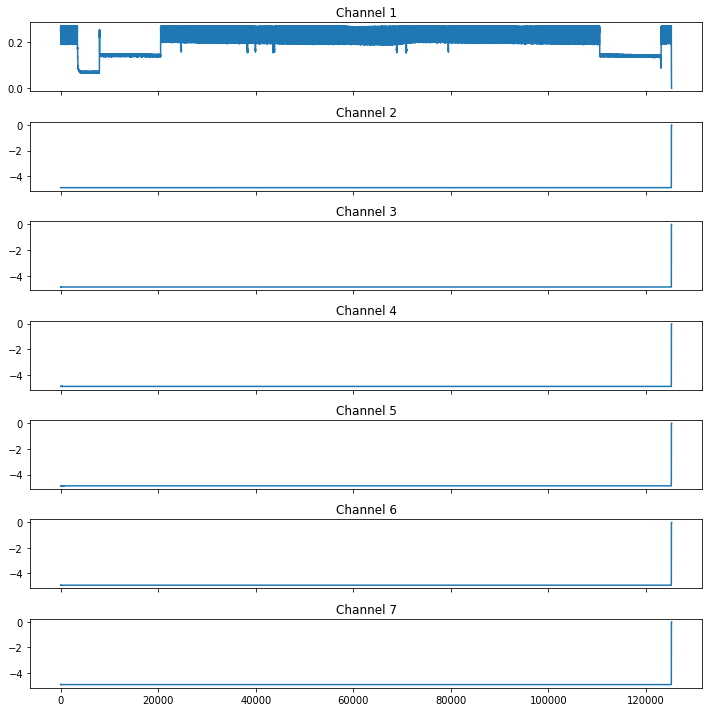

In [9]:
chans = 8
fig, axs = plt.subplots(chans-1,1, figsize = (10,10))

for chan in range(1,chans):
    axs[chan-1].plot(dataset['100_ADC%s'%chan]['data'][::10])
    if chan != chans-1 :
        axs[chan-1].set_xticklabels('')
    axs[chan-1].set_title('Channel %s' % (chan))
plt.tight_layout()

Text(0.5, 1.0, 'Each spike is a new frame')

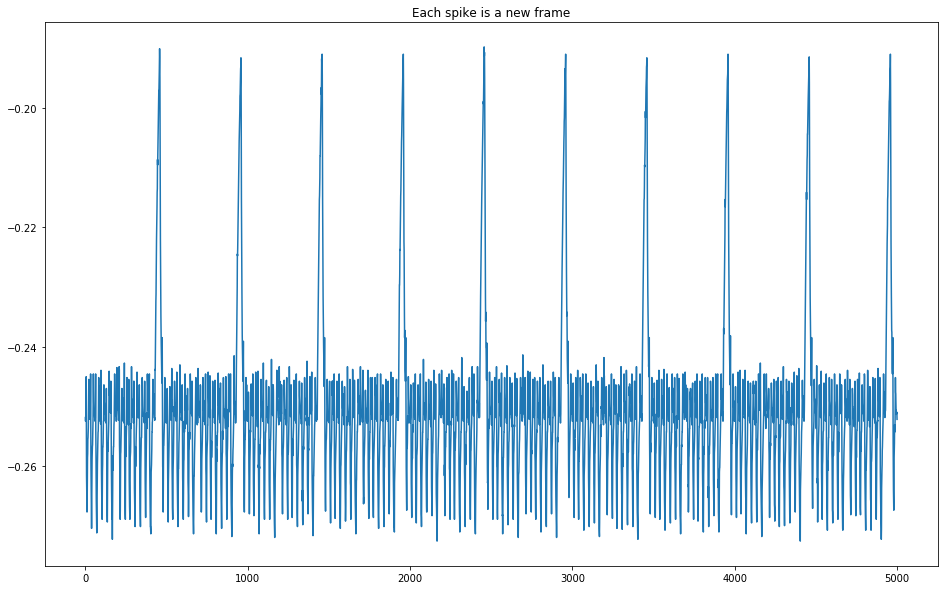

In [10]:
signal = -dataset['100_ADC1']['data']
plt.figure(figsize=(16,10))
plt.plot(signal[210000:215000])
plt.title('Each spike is a new frame')

Text(0.5, 1.0, 'Left drop is a 2 frame change, right is a one frame change')

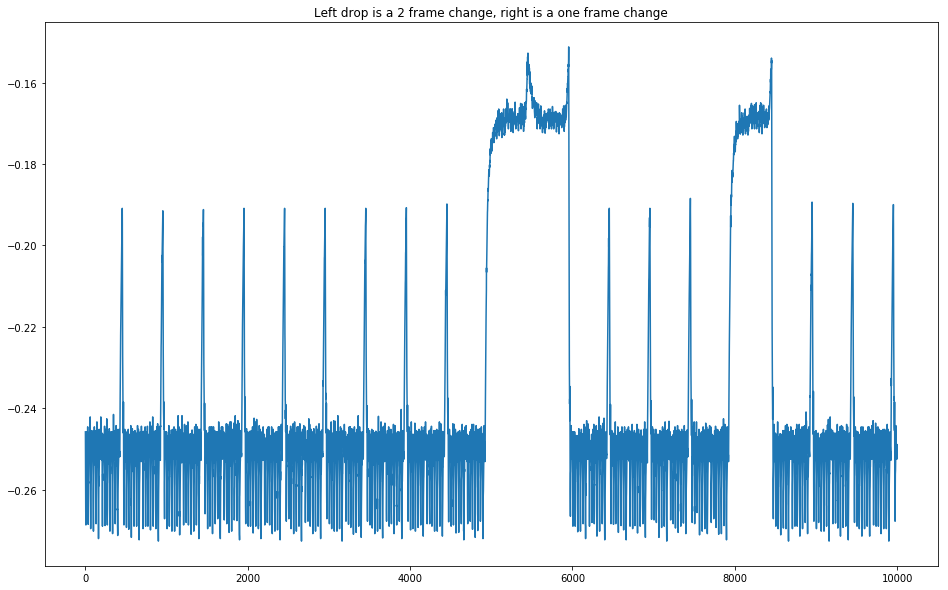

In [11]:
plt.figure(figsize=(16,10))
plt.plot(signal[430000:440000])
plt.title('Left drop is a 2 frame change, right is a one frame change')

In [40]:
signal.mean()

-0.22283527758939012

In [18]:
chunking_list

array([-0.22079484, -0.21926896, -0.21682755, ..., -0.        ,
       -0.        , -0.        ])

In [49]:
chunking_list

array([  34533,   34551,   34600, ..., 1252349, 1252350, 1252351])

In [52]:
len(chunking_list)

336222

In [62]:
threshold = signal.mean()+0.05
timeframe = 500

trues = (signal>threshold)
chunking_list = []
chunk_list = []
for it, a in enumerate(trues):
    if a == True : 
        chunking_list.append(it)

chunking_list = np.asarray(chunking_list)

it = 0
for datapoint in chunking_list:
    try :
        it +=1
        if it > 10 : #discard first few hits to be safe on initialisation nois
            if chunking_list[it] < chunking_list[it+timeframe]: 
                chunk_list.append(chunking_list[it])
                it += timeframe
                print('Found cluster at %s' % chunking_list[it])
    except IndexError: 
        print('Done chunking')
        break

print('Found total of %s cluster(s)' % len(chunk_list))

Found cluster at 35385
Found cluster at 35886
Found cluster at 36387
Found cluster at 36888
Found cluster at 37389
Found cluster at 37890
Found cluster at 38391
Found cluster at 38892
Found cluster at 39393
Found cluster at 39894
Found cluster at 40395
Found cluster at 40896
Found cluster at 41397
Found cluster at 41898
Found cluster at 42399
Found cluster at 42900
Found cluster at 43401
Found cluster at 43902
Found cluster at 44403
Found cluster at 44904
Found cluster at 45405
Found cluster at 45906
Found cluster at 46407
Found cluster at 46908
Found cluster at 47409
Found cluster at 47910
Found cluster at 48411
Found cluster at 48912
Found cluster at 49413
Found cluster at 49914
Found cluster at 50415
Found cluster at 50916
Found cluster at 51417
Found cluster at 51918
Found cluster at 52419
Found cluster at 52920
Found cluster at 53421
Found cluster at 53922
Found cluster at 54423
Found cluster at 54924
Found cluster at 55425
Found cluster at 55926
Found cluster at 56427
Found clust

In [57]:
%matplotlib notebook

<IPython.core.display.Javascript object>


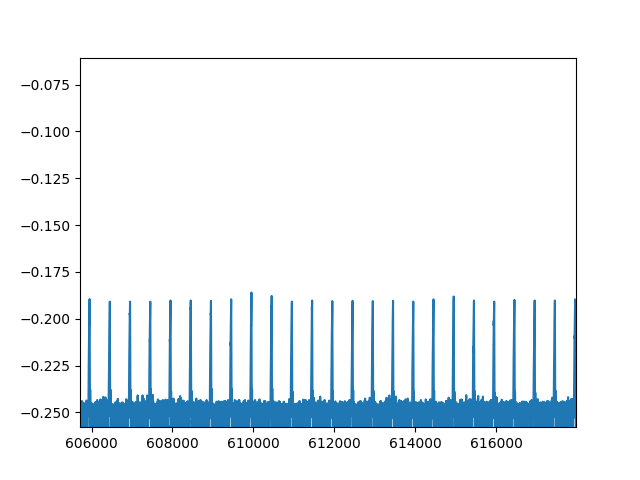

In [63]:
plt.plot(signal)
plt.plot(chunk_list, np.zeros_like(chunk_list), '.r')

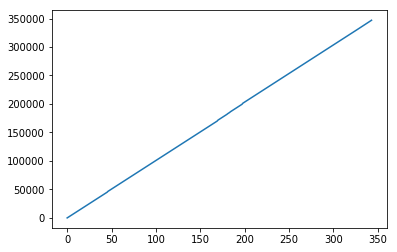

In [24]:
plt.plot(chunk_list)

In [15]:
plt.figure(figsize = (12,8))
plt.plot(chunk_list, np.linspace(photodiode_data.max(), photodiode_data.max(), len(chunk_list)), '.r')
plt.plot(timestamps, photodiode_data)

NameError: name 'photodiode_data' is not defined

<Figure size 864x576 with 0 Axes>

Now we can visualize a signal from the channels for each separate photodiode tick

In [ ]:
block_to_see = 2

one_particular_presentation = chunk_list[block_to_see+1]-chunk_list[block_to_see]
print('Visualizing signal from %ss to %ss, lasting %ss' % (chunk_list[block_to_see+1],
                                                           chunk_list[block_to_see],
                                                           one_particular_presentation))

time_beg = int(np.where(timestamps == chunk_list[block_to_see])[0])
time_end = int(np.where(timestamps == chunk_list[block_to_see+1])[0])
print('Array wise, the points range from %s to %s in the data' % (time_beg, time_end))

fig, axs = plt.subplots(chans,1, figsize = (10,30))

for chan in range(chans):
    axs[chan].plot(timestamps[time_beg:time_end], data[chan][time_beg:time_end])
    if chan != chans-1 :
        axs[chan].set_xticklabels('')
    axs[chan].set_title('Channel %s' % (chan+1))
plt.suptitle('Plotting recordings for one presentation', y = 1.01)
plt.tight_layout()